# 逻辑回归模型的torch实现

## 调用包

In [44]:
import torch
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import pickle
import numpy as np

## 模型训练


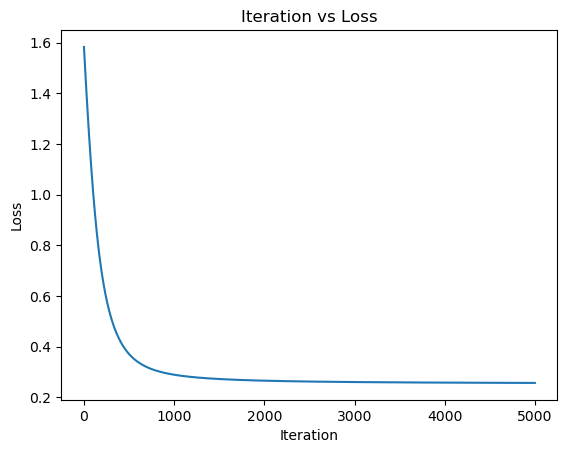

In [35]:
# 超参数
learn_rate = 1e-2
# 初始化参数
w = torch.randn(1,10,requires_grad = True)
b = torch.randn(1,requires_grad = True)

# 数据准备
X,y = make_classification(n_samples = 500,n_features = 10)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
# 创建张量
tensor_x = torch.tensor(X_train,dtype = torch.float)
tensor_y = torch.tensor(y_train,dtype = torch.float)

losses = []
# 训练
for i in range(5000):
    # 前向传播
    r = torch.nn.functional.linear(tensor_x,w,b)
    r = torch.sigmoid(r)
    # 计算损失
    loss = torch.nn.functional.binary_cross_entropy(r.squeeze(1),tensor_y,reduction = 'mean')
    
    losses.append(loss.item())
    # 反向传播，更新梯度
    loss.backward()
    with torch.autograd.no_grad():
        w -= learn_rate * w.grad
        w.grad.zero_()
        b -= learn_rate * b.grad
        b.grad.zero_()
    # print(f'train losss:{loss.item():.4f}')

# 保存数据集
data = {
    'X_train': X_train,
    'y_train': y_train,
    'X_test': X_test,
    'y_test': y_test
}
with open('dataset.pkl', 'wb') as f:
    pickle.dump(data, f)

torch.save({
    'w': w,
    'b': b
}, 'model_parameters.pth')

# 绘制 i 和 loss 的关系图
plt.plot(range(5000), losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Iteration vs Loss')
plt.show()

## 模型测试

In [46]:
# 加载参数
checkpoint = torch.load('model_parameters.pth')
w = checkpoint['w']
b = checkpoint['b']

# 预测函数
def predict(input_data):
    with torch.no_grad():  # 禁用梯度计算
        # 转换输入为张量
        input_tensor = torch.tensor(input_data, dtype=torch.float)
        # 前向传播（与训练时保持一致）
        linear_output = torch.nn.functional.linear(input_tensor, w, b)
        prob = torch.sigmoid(linear_output)
        return prob  # 返回概率值

# 加载测试集数据
with open('dataset.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

X_test = loaded_data['X_test']
y_test = loaded_data['y_test']
tensor_x = torch.tensor(X_test, dtype=torch.float)

# 预测
prediction = predict(tensor_x)

# 准确率计算
y_pred = [1 if prob > 0.5 else 0 for prob in prediction.numpy()]
accuracy = np.mean(y_pred == y_test)
print(f"准确率: {accuracy * 100:.2f}%")


准确率: 94.00%


C:\Users\czx\AppData\Local\Temp\ipykernel_2108\581096146.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('model_parameters.pth')
C:\Users\czx\App

# 模型训练基本步骤总结

1. 数据准备
2. 参数初始化
3. 向前传播（模型构建）
4. 损失函数定义
5. 反向传播（模型训练）
6. 参数更新
7. 循环迭代
8. 模型测试